In [1]:
#| default_exp session_1_example

In [ ]:
import pandas as pd
import numpy as np
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Session (shortened)

## DHFR gene

## Loading and filtering the metadata file

In [ ]:
samples_path = "/home/kevinkorfmann/Projects/malaria/data/Pf7_samples.txt"
samples_metadata = pd.read_csv(samples_path, sep="\t")

african_subset = ['Kenya', 'Ethiopia', 'Tanzania'] # 'Ethiopia', 'Tanzania', 'Uganda'

# form sample table above create mask to filter the table to only contain rows of interest
samples_metadata_mask = [True if criteria in african_subset else False for criteria in samples_metadata.Country]
samples_metadata = samples_metadata[samples_metadata_mask]

# quality control filtering
#samples_metadata = samples_metadata[samples_metadata["QC pass"]]

# we only look at genomic DNA (gDNA) for now
#samples_metadata_mask = [True if criteria in ["gDNA"] else False for criteria in samples_metadata["Sample type"]]
#samples_metadata = samples_metadata[samples_metadata_mask]

# reseting tables indices
#samples_metadata = samples_metadata.reset_index(drop=True)

In [ ]:
np.unique(samples_metadata.Country.tolist())

array(['Bangladesh', 'Benin', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Colombia', "Côte d'Ivoire", 'Democratic Republic of the Congo',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'India',
       'Indonesia', 'Kenya', 'Laos', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Nigeria',
       'Papua New Guinea', 'Peru', 'Senegal', 'Sudan', 'Tanzania',
       'Thailand', 'Uganda', 'Venezuela', 'Vietnam', 'nan'], dtype='<U32')

## Loading the VCF file

In [ ]:
vcf_file = str("../../datasets/malaria-chromosomes/DHFR-TS_surrounding_region.vcf.gz")
callset = allel.read_vcf(vcf_file, fields=['samples', 'calldata/GT', 'variants/ALT', 'variants/CHROM',
                                            'variants/FILTER_PASS', 'variants/ID', 'variants/POS',
                                            'variants/QUAL', 'variants/REF','calldata/GT','calldata/PS'])

gt = allel.GenotypeArray(callset['calldata/GT'])
phase_sets = callset['calldata/PS']
pos = callset["variants/POS"]

## Filtering the Genotypes

In [ ]:
def get_genotypes(samples, genotypes):
    mask = [True if sample in samples else False for sample in callset["samples"]]
    genotypes = genotypes[:,mask]
    gt_np = np.array(genotypes.to_haplotypes())
    return gt_np

samples_id = samples_metadata.Sample.tolist()
gt_samples = get_genotypes(samples_id, gt)

In [ ]:
gt_samples

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [-1, -1,  0, ...,  1,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

## Calculating the statistic and plotting

/opt/miniconda3/envs/workshop-kenya/lib/python3.10/site-packages/allel/stats/diversity.py:99: RuntimeWarning: divide by zero encountered in divide
  mpd = np.where(n_pairs > 0, n_diff / n_pairs, fill)


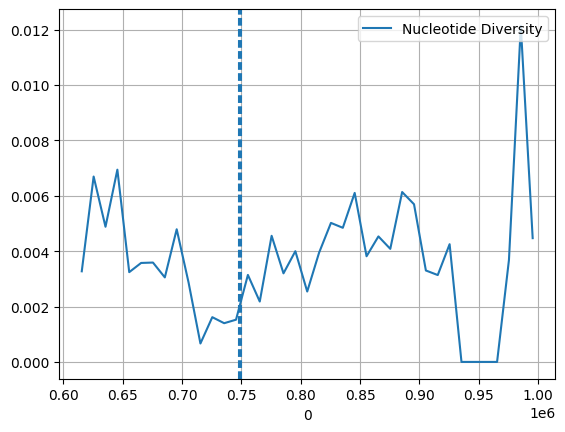

In [ ]:
ac = gt_samples
pi, windows, n_bases_sen, counts_sen = allel.windowed_diversity(pos=pos, ac=ac, size=10_000, start=pos[0])
window_start = pd.DataFrame(windows)[0]
sns.lineplot(x=window_start, y=pi, label="Nucleotide Diversity")

plt.axvline(747897, ls='--')
plt.axvline(750065, ls='--')
plt.grid(True)

## MDR 1 gene

In [ ]:
import pandas as pd
import numpy as np
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and filtering the metadata file

In [ ]:
samples_path = "/home/kevinkorfmann/Projects/malaria/data/Pf7_samples.txt"
samples_metadata = pd.read_csv(samples_path, sep="\t")

african_subset = ['Kenya'] # 'Ethiopia', 'Tanzania', 'Uganda'

# form sample table above create mask to filter the table to only contain rows of interest
samples_metadata_mask = [True if criteria in african_subset else False for criteria in samples_metadata.Country]
samples_metadata = samples_metadata[samples_metadata_mask]

# quality control filtering
samples_metadata = samples_metadata[samples_metadata["QC pass"]]

# we only look at genomic DNA (gDNA) for now
samples_metadata_mask = [True if criteria in ["gDNA"] else False for criteria in samples_metadata["Sample type"]]
samples_metadata = samples_metadata[samples_metadata_mask]

# reseting tables indices
samples_metadata = samples_metadata.reset_index(drop=True)

## Loading the VCF file

In [ ]:
vcf_file = str("../../datasets/malaria-chromosomes/MDR1_surrounding_region.vcf.gz")
callset = allel.read_vcf(vcf_file, fields=['samples', 'calldata/GT', 'variants/ALT', 'variants/CHROM',
                                            'variants/FILTER_PASS', 'variants/ID', 'variants/POS',
                                            'variants/QUAL', 'variants/REF','calldata/GT','calldata/PS'])

gt = allel.GenotypeArray(callset['calldata/GT'])
phase_sets = callset['calldata/PS']
pos = callset["variants/POS"]

## Filtering the Genotypes

In [ ]:
def get_genotypes(samples, genotypes):
    mask = [True if sample in samples else False for sample in callset["samples"]]
    genotypes = genotypes[:,mask]
    gt_np = np.array(genotypes.to_haplotypes())
    return gt_np

samples_id = samples_metadata.Sample.tolist()
gt_samples = get_genotypes(samples_id, gt)

## Calculating the statistic and plotting

/opt/miniconda3/envs/workshop-kenya/lib/python3.10/site-packages/allel/stats/diversity.py:99: RuntimeWarning: divide by zero encountered in divide
  mpd = np.where(n_pairs > 0, n_diff / n_pairs, fill)


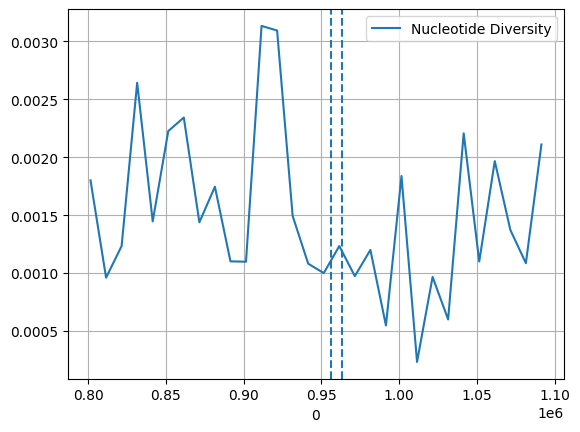

In [ ]:
ac = gt_samples
pi, windows, n_bases_sen, counts_sen = allel.windowed_diversity(pos=pos, ac=ac, size=10_000, start=pos[0])
window_start = pd.DataFrame(windows)[0]
sns.lineplot(x=window_start, y=pi, label="Nucleotide Diversity")

plt.axvline(955955, ls='--')
plt.axvline(963095, ls='--')
plt.grid(True)